In [1]:
from bda.utils import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


sum of probas:  1.0000000000000002


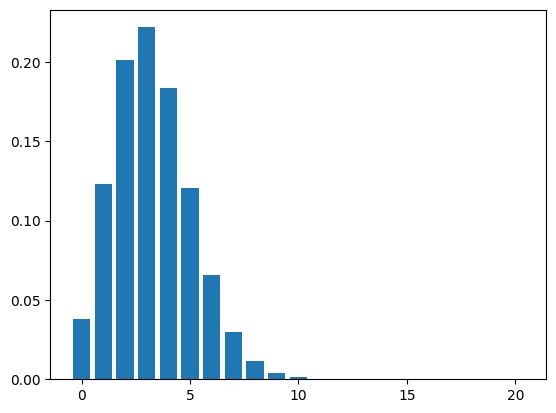

In [2]:
def plot_beta_binomial_posterior_predictive_model(a=4, b=6, n=100, y=14, n_=20):
    posterior = summarize_beta_binomial(a,b, n, y).loc["posterior"]
    posterior = stats.beta(posterior.alpha, posterior.beta)

    pi = np.linspace(0, 1, 10000)
    y = np.arange(0, n_+1)

    def f(y_:int, n:int):
        return np.trapz(stats.binom(n, pi).pmf(y_)*posterior.pdf(pi), pi)

    proba = [f(y_, n_) for y_ in y]

    print("sum of probas: ", sum(proba))

    plt.bar(y, proba)
    plt.show()

plot_beta_binomial_posterior_predictive_model()

sum of probas:  0.9999994541028664


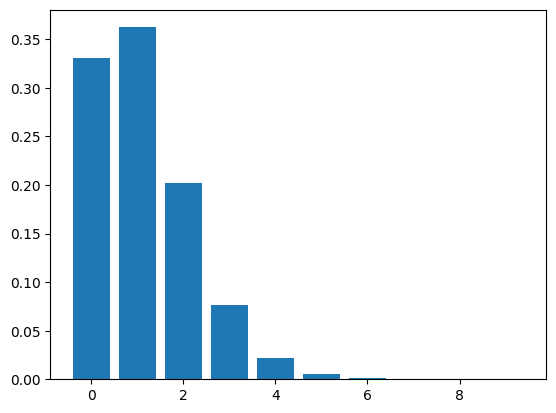

In [3]:
def plot_gamma_poisson_posterior_predictive_model(s=50, r=50, y_sum=7, n=1):
    posterior = summarize_gamma_poisson(s, r, y_sum, n).loc["posterior"]
    posterior = stats.gamma(a=posterior["shape"], scale=1/posterior.rate)

    lambdas = np.linspace(0, 5, 10000)
    y = np.arange(0, 10)

    def f(y_:int):
        return np.trapz(stats.poisson(lambdas).pmf(y_)*posterior.pdf(lambdas), lambdas)

    proba = [f(y_) for y_ in y]

    print("sum of probas: ", sum(proba))

    plt.bar(y, proba)
    plt.show()

plot_gamma_poisson_posterior_predictive_model()